In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [ ]:
# Lê a tabela da página da B3
tabelas = pd.read_html(url, decimal=',', thousands='.')
df_ibov = tabelas[0]
tickers_b3 = df_ibov['Código'].tolist()

In [3]:
# Adiciona '.SA' para funcionar com yfinance
tickers = [
    'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA',
    'ABEV3.SA', 'B3SA3.SA', 'RENT3.SA', 'WEGE3.SA', 'MGLU3.SA',
    'LREN3.SA', 'HAPV3.SA', 'GGBR4.SA', 'CSNA3.SA', 'PRIO3.SA'
]

Total de ações do IBOV: 15


[*********************100%***********************]  15 of 15 completed


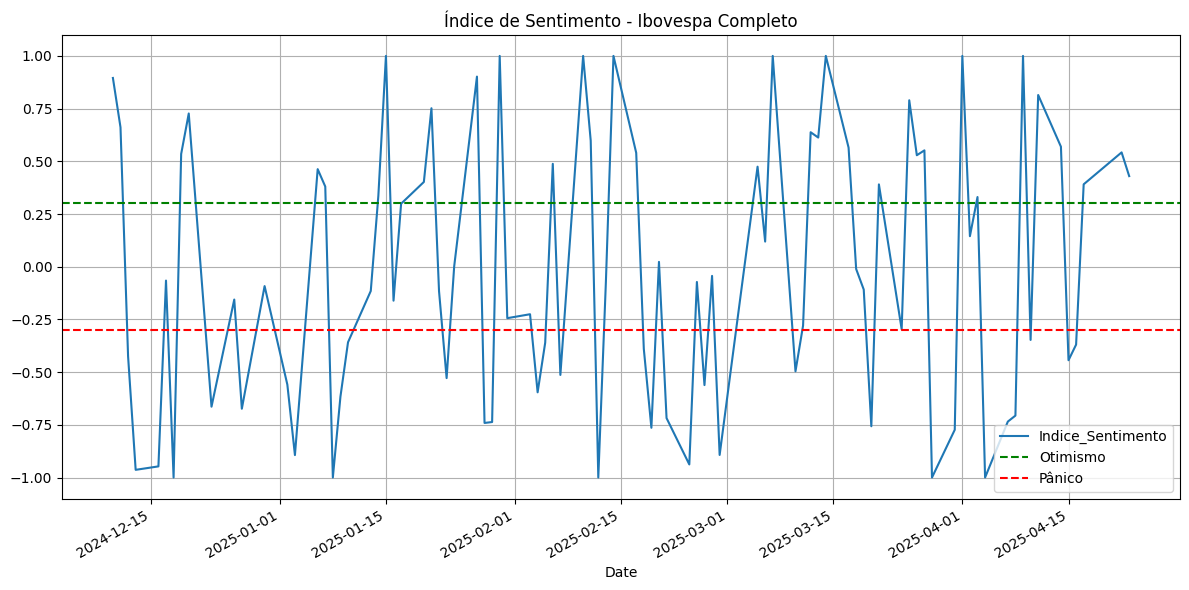

In [4]:


print(f"Total de ações do IBOV: {len(tickers)}")

# 2. Baixar dados históricos
periodo = '90d'
data = yf.download(tickers, period=periodo, interval='1d', group_by='ticker', auto_adjust=True, threads=True)

# 3. Calcular índice de sentimento ao longo do tempo
datas = data.index
df_resultado = pd.DataFrame(index=datas[1:])
indices = []

for i in range(1, len(datas)):
    dia_atual = datas[i]
    dia_anterior = datas[i - 1]

    soma_num = 0
    soma_den = 0

    for ticker in tickers:
        try:
            preco_atual = data[ticker]['Close'].loc[dia_atual]
            preco_anterior = data[ticker]['Close'].loc[dia_anterior]
            volume = data[ticker]['Volume'].loc[dia_atual]

            retorno = (preco_atual - preco_anterior) / preco_anterior
            sinal = 1 if retorno > 0 else (-1 if retorno < 0 else 0)

            soma_num += volume * sinal
            soma_den += abs(volume * sinal)

        except Exception:
            continue

    indice = soma_num / soma_den if soma_den != 0 else 0
    indices.append(indice)

df_resultado['Indice_Sentimento'] = indices

# 4. Visualizar
df_resultado.plot(title='Índice de Sentimento - Ibovespa Completo', figsize=(12, 6), legend=False)
plt.axhline(0.3, color='green', linestyle='--', label='Otimismo')
plt.axhline(-0.3, color='red', linestyle='--', label='Pânico')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  15 of 15 completed


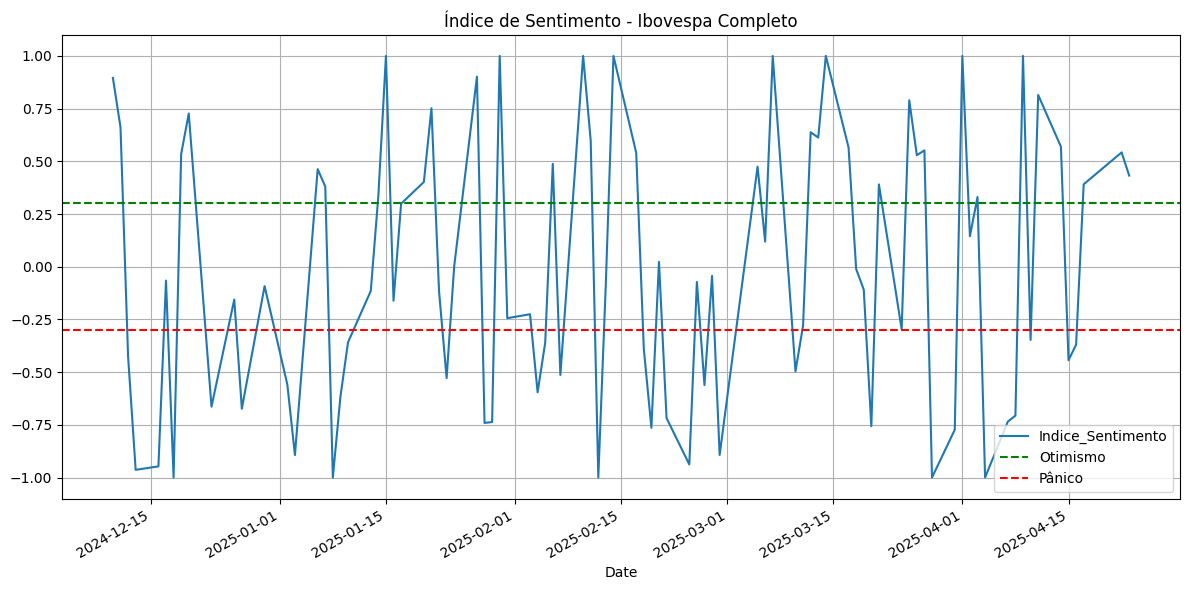

In [6]:
import plotly.graph_objects as go



# 2. Baixar histórico
periodo = '90d'
data = yf.download(tickers, period=periodo, interval='1d', group_by='ticker', auto_adjust=True, threads=True)

# 3. Calcular índice de sentimento
datas = data.index
df_resultado = pd.DataFrame(index=datas[1:])
indices = []

for i in range(1, len(datas)):
    dia_atual = datas[i]
    dia_anterior = datas[i - 1]
    soma_num, soma_den = 0, 0

    for ticker in tickers:
        try:
            preco_atual = data[ticker]['Close'].loc[dia_atual]
            preco_anterior = data[ticker]['Close'].loc[dia_anterior]
            volume = data[ticker]['Volume'].loc[dia_atual]

            retorno = (preco_atual - preco_anterior) / preco_anterior
            sinal = 1 if retorno > 0 else (-1 if retorno < 0 else 0)

            soma_num += volume * sinal
            soma_den += abs(volume * sinal)
        except:
            continue

    indice = soma_num / soma_den if soma_den != 0 else 0
    indices.append(indice)

df_resultado['Indice_Sentimento'] = indices

# 4. Plotar gráfico histórico
df_resultado.plot(title='Índice de Sentimento - Ibovespa Completo', figsize=(12, 6), legend=False)
plt.axhline(0.3, color='green', linestyle='--', label='Otimismo')
plt.axhline(-0.3, color='red', linestyle='--', label='Pânico')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# 5. Gauge: último valor
indice_atual = df_resultado['Indice_Sentimento'].iloc[-1]
indice_ontem = df_resultado['Indice_Sentimento'].iloc[-2]
variacao = indice_atual - indice_ontem
data_ult = df_resultado.index[-1].strftime('%Y-%m-%d')

fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=indice_atual,
    delta={'reference': indice_ontem, 'increasing': {'color': "green"}, 'decreasing': {'color': "red"}},
    number={'font': {'size': 48}},
    gauge={
        'axis': {'range': [0, 1], 'tickvals': [0, 0.2, 0.4, 0.6, 0.8, 1], 
                 'ticktext': ['Pânico', 'Medo', 'Neutro', 'Neutro', 'Confiante', 'Otimismo']},
        'bar': {'color': 'brown', 'thickness': 0.3},
        'bgcolor': "lightgray",
        'steps': [
            {'range': [0, 0.2], 'color': '#e6e6e6'},
            {'range': [0.2, 0.4], 'color': '#d9d9d9'},
            {'range': [0.4, 0.6], 'color': '#cccccc'},
            {'range': [0.6, 0.8], 'color': '#bfbfbf'},
            {'range': [0.8, 1.0], 'color': '#b3b3b3'}
        ],
    },
    title={'text': f"Índice de Pânico e Otimismo<br><span style='font-size:0.9em'>Data: {data_ult}</span>"}
))

fig.update_layout(height=500, margin={'t': 80, 'b': 0})
fig.show()
